# Over the Educational System and Environments

The **Nacional High School Exam**, or [ENEM](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), takes place every year - since 1998 - and it's the bigger exam in Brazil, with around [5 million entries per year](http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/5-8-milhoes-estao-inscritos-para-fazer-o-enem-2020/21206#:~:text=Finalizadas%20as%20etapas%20de%20inscri%C3%A7%C3%A3o,Ensino%20M%C3%A9dio%20(Enem)%202020.).

Last year, the exam was a little different, due to the coronavirus, that led to the postponement of the test, a lot of preventive [measures](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem/orientacoes/medidas-de-prevencao-a-covid-19) for the examination and the geatest abstention in history: [more than half of the candidates did not take the ENEM test](https://educacao.uol.com.br/noticias/2021/01/17/mec-culpa-medo-da-covid-19-e-midia-contra-por-abstencao-de-515-no-enem.htm).

![](https://github.com/KenzoBH/Data-Science/blob/main/Images/Slide2.PNG)

Indeed, it is a grat experience in the Brazilian student life that seeks a place in the university, since ENEM is a gateaway to several colleges over the country - in addition to being the selective proccess of Federal Universities in Brazil. Many universities (including the public ondes), in addition to their own entrance exams, offer exclusive places for the exam, through SiSU *(Unified Selection System)*, and a lot of private universities offer scholarships to participants regarding their exam scores.

The ENEM occours in two days: one reserved for Humanities, Languages and Composition, and the other one for Mathematics and Nature Sciences (currently, the test follows this patterm, but it was already different, and may be different at the moment of your reading).

In this article, we will explore the data - available by [Inep](https://enem.inep.gov.br/participante/), the body responsible for the ENEM - related to the 2007 to 2015 exams organized by school. The data was downloaded in [this link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola), and I will focus the analysis over the city of São Paulo, where I am from. 

It's notable that the school at which candidate studied has a strong influence on his performance. Often, at not so good schools, many seek to take preparatory courses for ENEM.
We will see the relationship between the nature of the school and the performace of its students. How does the environment influence the candidate's future? It influence in fact? Let's take a look!

***

## Summary

1. [Data import](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#1-importa%C3%A7%C3%A3o-do-dataset)
    1. Cleaning
2. Brazil
3. [São Paulo in the ENEM](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#2-brasil)
    1. Best ones (are you sure?)
    2. The administrative dependencies
    3. Technical schools: why?
4. Conclusion

***

# 1. Data import

First, let's import some packages. I will import `pandas` and `numpy` for data manipulation and `matplotlib` for the plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, let's import our dataset. The file downloaded int the Inep website contains the variables dictionary, and I will present later.   
Let's see.

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv', sep = ';',
                  encoding = 'ISO-8859-1', low_memory = False)
df.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


There's a lot of variables that I won't use here in our analysis, and I will drop them below.

In [3]:
df.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

How many rows are in our dataset?

In [4]:
df.shape

(172305, 27)

There are 172305 rows.   
Each one represents the performance of a Brazilian school in an ENEM edition (2007 to 2015).   
Now, I will select the columns for our analysis.

In [5]:
selected = ['NU_ANO', 'SG_UF_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'NO_ESCOLA_EDUCACENSO',
          'TP_DEPENDENCIA_ADM_ESCOLA', 'PORTE_ESCOLA',
          'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']
df_selected = df[selected]
df_selected.head()

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,PORTE_ESCOLA,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,72.16
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,De 1 a 30 alunos,NaN,NaN,NaN,NaN,NaN


## 1.1 Cleaning

As this article is in English, I will translate the columns from Português to English to mantain a standard in the language here.

In [6]:
pt_to_en = {
    'NU_ANO': 'year',
    'SG_UF_ESCOLA': 'state',
    'NO_MUNICIPIO_ESCOLA': 'city',
    'NO_ESCOLA_EDUCACENSO': 'school_name',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'administrative_dependency',
    'PORTE_ESCOLA': 'school_size',
    'NU_MEDIA_CN': 'mean_nat',
    'NU_MEDIA_CH': 'mean_hum',
    'NU_MEDIA_LP': 'mean_lan',
    'NU_MEDIA_MT': 'mean_mat',
    'NU_MEDIA_RED': 'mean_com'}

df_selected = df_selected.rename(columns = pt_to_en)
df_selected.head()

,year,state,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,72.16
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,De 1 a 30 alunos,NaN,NaN,NaN,NaN,NaN


Cool. Now, the variables dictionary:
    
-   **year**: The year of the ENEM edition by school.
-   **state**: Abbreviation of the Federation Unit of the school.
-   **city**: Name of the city of the school.
-   **school_name**: School name.
-   **administrative_dependency**: Type od administrative dependency of the school.
    -   1 - Federal,
    -   2 - State,
    -   3 - Municipal,
    -   4 - Private.
-   **school_size**: School size
    -   De 1 a 30 alunos - Between 1 and 30 students,
    -   De 31 a 60 alunos - Between 31 and 60 students,
    -   De 61 a 90 alunos - Between 61 and 90 students,
    -   Maior que 90 alunos - More than 90 students.
-   **mean_nat**: Average grades of Natural Sciences.
-   **mean_hum**: Average grades of Humanities.
-   **mean_lan**: Average grades of Languages.
-   **mean_mat**: Avarage grades of Mathematics.
-   **mean_com**: Average grades of Compostion.

But first, let's transform the `administrative_dependency` column data into the real values.

In [7]:
df_selected = df_selected.replace({
    1 : "Federal",
    2 : "Municipal" ,
    3 : "State",
    4 : "Private"})
pd.DataFrame(
    df_selected['administrative_dependency'].value_counts())

,administrative_dependency
Municipal,114546
Private,53596
State,2262
Federal,1901


There's a lot of municipal schools in Brazil. More than the sum of the other school types.

I'll translate the `school_size` column.

In [8]:
df_selected = df_selected.replace({
    'Maior que 90 alunos': 'More than 90 students',
    'De 61 a 90 alunos': 'Between 61 and 90 students',
    'De 31 a 60 alunos': 'Between 31 and 60 students',
    'De 1 a 30 alunos': 'Between 1 and 30 students'})
pd.DataFrame(
    df_selected['school_size'].value_counts())

,school_size
More than 90 students,71202
Between 31 and 60 students,40449
Between 1 and 30 students,32768
Between 61 and 90 students,27886


# 2. Brazil

Let's take a look o the data relative to the country.   
First, I wanna see how the average grades have behaved over the years.

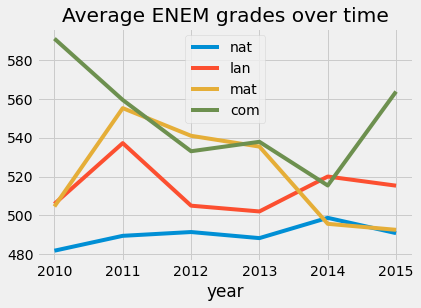

In [9]:
br = (df_selected[df_selected['year'] >= 2010]) # I will look for the years after 2010
plt.style.use('fivethirtyeight') # and use this style of matplotlib

for subject in ['nat', 'lan', 'mat', 'com']:
    br.groupby('year')['mean_' + subject].mean(
    ).plot(label = subject)
plt.title('Average ENEM grades over time')
plt.legend()
plt.show()

It seems that the Math test is getting harder as time goes by and Composition highly increased its average grade in 2015.   
Is the Nature Sciences test the harder one?

I found something: on the ENEM 2015, only 36 schools from RR (Roraima) was included in our data. 36 schools for the entire state of Roraima is a really small quantity. Why are there so few schools? Once this dataset was produced in 2019, this data should not be outdated. Anyway: [I searched for the number of schools in RR](http://dadosroraima.com/numero-de-escolas-no-estado-de-roraima/), and there are a total of 849 schools there.   
I don't think that only 36 from these 849 participied in the ENEM 2015, I think that are some *implicit* missing values.   
Take a look:

In [10]:
only_2015 = (br['year'] == 2015)
br[only_2015].groupby('state')[['school_name']].count().sort_values(by = 'school_name')

,school_name
state,
RR,36
AC,55
AP,58
RO,163
AM,164
TO,172
DF,187
SE,189
AL,211


Let put this aside (even though it's a interesting and important discussion). Let's go ahead on our analysis.

What's the state with the higher Language average grade? Let's see.

In [11]:
br.groupby('state')[['mean_lan']].mean(
    ).sort_values(by = 'mean_lan', ascending = False)

,mean_lan
state,
DF,536.818250
SP,534.390967
RJ,532.135457
MG,520.600538
RS,518.163339
PR,512.747772
SC,511.227507
BA,506.084114
GO,505.655247


We see that DF has the higher average grade in the Languages test, followed by 3 states from the southeast. Let's see the best schools in each states and then we will start our analysis over São Paulo city.

In [12]:
br.loc[br.groupby('state')['mean_mat'].idxmax(),
       ['state', 'school_name', 'mean_mat',
        'mean_nat', 'mean_lan', 'mean_com',
        'administrative_dependency', 'year']].set_index(
        'state').sort_values('mean_mat', ascending = False)

,school_name,mean_mat,mean_nat,mean_lan,mean_com,administrative_dependency,year
state,,,,,,,
SP,OBJETIVO COLEGIO INTEGRADO,873.65,728.80,681.23,813.17,Private,2015
RJ,COLEGIO E CURSO PONTO DE ENSINO,868.38,709.38,628.93,715.79,Private,2014
CE,FARIAS BRITO COLEGIO DE APLICACAO,858.40,734.82,655.11,786.36,Private,2014
MG,COLEGIO ELITE VALE DO ACO,841.98,706.02,637.61,778.26,Private,2014
GO,COLEGIO OLIMPO INTEGRAL,841.00,731.12,654.07,837.78,Private,2014
PI,INST DOM BARRETO,832.80,699.96,645.35,897.42,Private,2015
MS,COLEGIO BIONATUS II,806.83,697.96,641.22,870.45,Private,2014
ES,IFES - CAMPUS VITORIA,806.80,679.32,634.84,693.17,Federal,2014
DF,COL OLIMPO,793.46,693.25,624.09,775.76,Private,2013


There's something peculiar in this table.   
DF is not on the top anymore, quite the contrary, it is in the 9th position right now. What does that mean? Does it means that the education in DF is more regular than the other states? In other words, in other states, like PI and CE (that were one of the last ones in the other table), the average education it's not so good, even having really good schools (like Colégio Farias Brito de Aplicação in CE). Is it evidencing a great inequality? Think about it.   
Moreover, there are no municipal schools or state schools here. We will see more about it right now, analysis the city of São Paulo.   
Let's do it.

# 3. São Paulo in the ENEM

Let's begin our analysis in the São Paulo city.   
First, I will filter our dataset `df_selected` to collect the data reffering to São Paulo in the year of 2015. I will save this data in the `sp` variable.

In [13]:
sp_filter = ((df_selected['year'] == 2015) &
               (df_selected['city'] == 'São Paulo'))
sp = df_selected.loc[sp_filter, 'city':]
sp.sample(5)

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
123426,São Paulo,ROOSEVELT PRESIDENTE,Municipal,Between 61 and 90 students,472.61,565.84,514.82,464.19,513.78
132234,São Paulo,ANTARES COLEGIO,Private,Between 1 and 30 students,462.25,537.94,504.28,476.68,563.08
138757,São Paulo,ADELIA COSTA E SILVA COLEGIO,Private,Between 31 and 60 students,473.62,591.28,554.99,491.76,637.84
143594,São Paulo,IRMA CHARLITA,Municipal,Between 61 and 90 students,467.12,549.67,504.59,440.14,564.64
142333,São Paulo,GILDO MARCAL BEZERRA BRANDAO ETEC,Municipal,Between 61 and 90 students,544.04,630.48,580.53,547.05,618.90


In [14]:
sp.shape

(701, 9)

There are 701 schools in São Paulo in this dataset.

What's the distribuition of the average Math grades of the schools ins São Paulo? I plotted an histogram to see it.

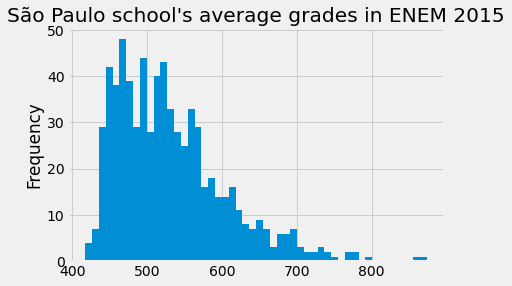

In [15]:
sp['mean_mat'].plot.hist(bins = 50)
plt.title("São Paulo school's average grades in ENEM 2015")
plt.show()

There are some insights that we can take from this histogram.   
Most schools are concentrated in the 450 to 550 points. That's a low grade. In the city, the minimum grade for the Medicine course in the University of São Paulo was [920 points](https://g1.globo.com/educacao/enem/2019/noticia/2020/01/22/nota-de-corte-para-medicina-no-1o-dia-do-sisu-vai-de-71797-a-92813-na-ampla-concorrencia.ghtml) last year, on the ENEM 2019.   
But there are some more interesting thing in this data. There are a little group that surpasses the 800 points. Those are the best schools in the city. Who are they?

In [16]:
sp[sp['mean_mat'] > 800]

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
141940,São Paulo,OBJETIVO COLEGIO INTEGRADO,Private,Between 31 and 60 students,728.80,721.47,681.23,873.65,813.17
142729,São Paulo,ETAPA III COLEGIO,Private,Between 31 and 60 students,730.51,705.41,650.68,858.77,783.75


It's cool to see that, even in a city that a lot of schools don't hava good performance, there are a few that have excellent grades. What does that mean? *Is it a signal of inequality or lack of democracy access to education?* Think about it, and let's see the best schools in São Paulo. 

## 3.1 Best ones (are you sure?)

What defines a school to be *better* than another?   
This question is really hard to answer. You could think about the percentage of the students who joined public universities: but how could you measure the role of the school in the approval of its students? The may have studied on their own, or taken a preparatory course, and thus, the school woudn't have such prestige.   
Besides, only grades determine whether a school is good? How about the education proivided for the formation of good citizens? Does the school boil down taining people who know how to ged good grades in tests? *What's the role of the school?* Think about it.

But, here I will consider the grades to rank our schools in São Paulo.   
Let's begin looking for the best schools in Mathematics.

In [17]:
sp.loc[:, 'school_name':].sort_values(
    by = 'mean_mat', ascending = False).head(10)

,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
141940,OBJETIVO COLEGIO INTEGRADO,Private,Between 31 and 60 students,728.80,721.47,681.23,873.65,813.17
142729,ETAPA III COLEGIO,Private,Between 31 and 60 students,730.51,705.41,650.68,858.77,783.75
137771,VERTICE COLEGIO UNIDADE II,Private,Between 61 and 90 students,698.02,702.69,649.93,792.06,778.13
132430,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,Private,More than 90 students,650.56,691.59,632.86,782.11,814.26
139979,MOBILE COLEGIO,Private,More than 90 students,689.40,708.53,648.92,779.91,812.42
132528,SANTA CRUZ COLEGIO,Private,More than 90 students,648.54,694.98,636.42,772.54,745.98
132568,BANDEIRANTES COLEGIO EFM,Private,More than 90 students,658.60,677.00,632.39,766.46,705.40
135822,ALBERT SABIN COLEGIO,Private,More than 90 students,649.94,680.01,622.18,747.35,772.00
142290,GERMINARE ESCOLA,Private,Between 61 and 90 students,617.97,668.95,621.39,743.58,753.82
137083,AGOSTINIANO MENDEL COLEGIO,Private,More than 90 students,665.34,675.23,619.24,743.30,728.61


As a student from São Paulo, I know most of these names. They are famous schools on the high school environment.   
And there is a common element for all those schools: they are private schools (and the most have high monthly fees).   
It's cool to see that a lot of them are big schools, and end up providing quality education for more students.
- **Conclusion**: the best schools in São Paulo are private schools.

So: where are the public schools? Let's take a look at the best ones.

In [18]:
pub_filter = (sp['administrative_dependency'] != 'Private')
sp_pub = sp[pub_filter]
sp_pub.sort_values(
    by = 'mean_mat', ascending = False)[
    ['school_name', 'mean_mat', 'school_size', 'administrative_dependency']].head(15)

,school_name,mean_mat,school_size,administrative_dependency
145625,IFSP - CAMPUS SAO PAULO,702.40,More than 90 students,Federal
144425,SAO PAULO ETEC DE,691.92,More than 90 students,Municipal
123015,MARTIN LUTHER KING ETEC,631.33,More than 90 students,Municipal
142476,IRMA AGOSTINA ETEC,623.82,More than 90 students,Municipal
123273,BASILIDES DE GODOY PROF ETEC,623.56,More than 90 students,Municipal
142132,TAKASHI MORITA ETEC,618.28,Between 61 and 90 students,Municipal
123298,GUARACY SILVEIRA ETEC,610.01,More than 90 students,Municipal
123428,GETULIO VARGAS ETEC,606.07,More than 90 students,Municipal
141977,TEREZA APARECIDA CARDOSO NUNES DE OLIVEIRA ETEC,596.58,More than 90 students,Municipal
122702,ALBERT EINSTEIN ETEC,592.45,More than 90 students,Municipal


We can see something remarkable: **all of them are technical schools** ([IFSP - CAMPUS SAO PAULO is a technical school too](https://www.ifsp.edu.br/cursos?layout=edit&id=123)).    
What does that mean? Think about it (we will return to this discussion later).
- **Conclusion**: the best public schools are the technical ones.

## 3.2 The administrative dependencies

How the administrative dependency affects the performace of the school performance?

In [19]:
pd.DataFrame(
    sp.groupby('administrative_dependency')['school_name'].count())

,school_name
administrative_dependency,
Federal,1
Municipal,190
Private,505
State,5


What are the state and federal ones? There only one federal: which is the best public school in the city.

In [20]:
sp[sp['administrative_dependency'].isin(['Federal', 'State'])]

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
131626,São Paulo,EMEFM LINNEU PRESTES PROF,State,Between 61 and 90 students,461.36,542.52,492.82,431.28,500.39
131766,São Paulo,EMEFM DERVILLE ALLEGRETTI PROF,State,More than 90 students,481.37,561.82,517.59,473.80,531.26
140992,São Paulo,EMEFM GUIOMAR CABRAL,State,Between 61 and 90 students,467.82,556.64,501.16,431.27,531.43
140995,São Paulo,EMEFM ANTONIO SAMPAIO VER,State,Between 31 and 60 students,441.03,543.19,497.51,437.52,475.65
140999,São Paulo,EMEFM DARCY RIBEIRO,State,More than 90 students,475.82,550.30,508.05,468.90,555.81
145625,São Paulo,IFSP - CAMPUS SAO PAULO,Federal,More than 90 students,605.28,662.32,610.49,702.40,647.54


I wanna see how the administrative dependecy affects the performance of the students. Let's do a boxplot over the avarage grades on Composition.   
What do you expect?   
In this year (2015), the essay theme was "The persistency of the violence agains woman in the Brazilian society".

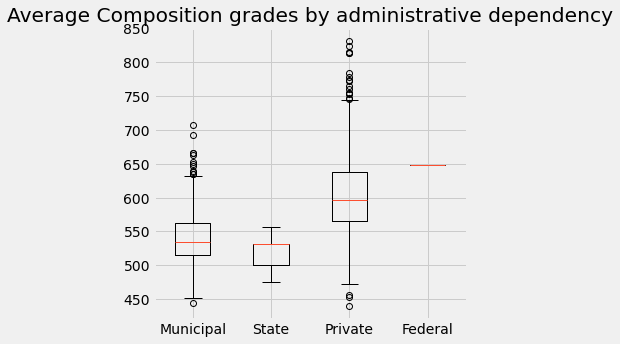

In [21]:
adm_col = sp['administrative_dependency']
# list comprehension to get a list of lists referring to each type of a.d.
adm_com = [sp[adm_col == x]['mean_com'].tolist()
          for x in adm_col.unique()]

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
bx = ax.boxplot(adm_com)
ax.set_xticklabels(['Municipal', 'State', 'Private', 'Federal'])
plt.title('Average Composition grades by administrative dependency')
plt.show()

We can see that the private ones are better than the other ones - there are only one federal school and only few state schools, and that makes hard to compare them. But, between the private and the municpal schools are a big difference on the Composition grade.   
It's nice to see that there are a lot of private schools that are worse than state and municipal schools - and the lowest grade was from a private school.   
Can you conclude that private schools are better than the public schools, in general? I guess so. The medians are too distant.

## 3.3 Technical schools: why?

Let's get back to that insight: the best public schools in São Paulo are technical schools. *Why?*   
First, let's check their administrative dependencies.

In [22]:
tec_filter = sp['school_name'].str.contains('TEC')
sp_tec = sp[tec_filter]
pd.DataFrame(
    sp_tec.loc[tec_filter, 'administrative_dependency'].value_counts())

,administrative_dependency
Municipal,37
Private,7


I searched for the schools whose names contains the string 'TEC', which (I think) refers to 'ETEC', or 'TECNICA', or 'TECNICO'.   
Then, I looked for the `administrative_dependency` column. There are 7 private technical schools. Let's see who are they.

In [23]:
sp_tec.loc[sp['administrative_dependency'] == 'Private',
         ['school_name', 'mean_com', 'administrative_dependency']]

,school_name,mean_com,administrative_dependency
132430,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,814.26,Private
132743,WALTER BELIAN ESCOLA TECNICA,737.31,Private
137040,CETEC COLEGIO,565.10,Private
137590,EAG EAG COLEGIO TECNICO,504.76,Private
137891,COLEGIO GUARARAPES EIEFEM E TECNICO,563.23,Private
142462,PAULISTA COLEGIO TECNICO,548.46,Private
142978,TECLA COLEGIO,564.71,Private


So, we see that we have some wrong data here. I guess that ['CETEC COLEGIO'](http://www.colegiocetec.com.br/) and ['TECLA COLEGIO'](https://colegiotecla.com.br/) are not technical schools. I searched for them on Google, and they're not technical schools, like I guessed; but, they are at the `sp_tec` dataframe that I created, because they have 'TEC' in their names. However, it won't disturb our analysis over the technical schools.   
We see that 'LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA TECNICA' (where I studied) has a much higher grade in Composition than the other ones. 'WALTER BELIAN ESCOLA TECNICA' has a high grade here too.

Let's see who are the best technical schools in the city. I will order by the average grade in Humanities this time.

In [24]:
sp_tec.loc[:, 'school_name':].sort_values(
    by = 'mean_hum', ascending = False).head()

,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
132430,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,Private,More than 90 students,650.56,691.59,632.86,782.11,814.26
144425,SAO PAULO ETEC DE,Municipal,More than 90 students,617.86,677.17,623.83,691.92,707.27
123298,GUARACY SILVEIRA ETEC,Municipal,More than 90 students,572.43,654.05,606.40,610.01,649.10
142476,IRMA AGOSTINA ETEC,Municipal,More than 90 students,577.76,647.10,597.25,623.82,646.92
122702,ALBERT EINSTEIN ETEC,Municipal,More than 90 students,553.29,644.57,603.78,592.45,628.08


We see that the best technical school is [Liceu de Artes e Ofícios de São Paulo](https://www.liceuescola.com.br/), followed by [ETEC de São Paulo](http://www.etesaopaulo.com.br/). They are really distant from the other ones.

How about the public schools that don't have technical courses? Let's take a look. I will rank by the average grade in Maths.

In [25]:
sp_pub_not_tec = sp_pub.loc[
    ~tec_filter, # selecting the public schools that are not technical
           ['school_name', 'mean_mat', 'school_size']]
sp_pub_not_tec.sort_values(
    by = 'mean_mat', ascending = False).head(20)

,school_name,mean_mat,school_size
145625,IFSP - CAMPUS SAO PAULO,702.40,More than 90 students
123351,ARISTIDES DE CASTRO,553.03,Between 1 and 30 students
123362,OSWALDO ARANHA,500.54,Between 31 and 60 students
131150,ESCOLA DE APLICACAO DA FACULDADE DE EDUCACAO D...,497.50,Between 31 and 60 students
123286,ALEXANDRE VON HUMBOLDT,496.26,More than 90 students
123250,JOSE MONTEIRO BOANOVA PROFESSOR,495.87,Between 61 and 90 students
123008,JOAO BORGES PROFESSOR,488.98,More than 90 students
123579,ALBERTO SALOTTI PROF EE,488.32,More than 90 students
123331,FABIANO LOZANO MAESTRO,488.30,More than 90 students
123317,ARCY MAJOR,488.05,Between 31 and 60 students


Here, we see that IFSP is in data. Why?   
Because I filtered the public schools (IFSP is a public and technical school), and then, a few blocks ago, I got the technic schools seeing if they had 'TEC' in their name. As IFSP - Campus São Paulo don't have 'TEC', it came to this `dataset`, and stayed out of the other dataset of the technical schools, `sp_tec`.   
To fix this, and put the IFSP on the `sp_tec`dataset, I will use the method `.append()`

In [26]:
ifsp = sp_pub.loc[sp_pub['school_name'] == 'IFSP - CAMPUS SAO PAULO', :]
sp_tec = sp_tec.append(ifsp)
sp_tec.tail(3)

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
144425,São Paulo,SAO PAULO ETEC DE,Municipal,More than 90 students,617.86,677.17,623.83,691.92,707.27
145576,São Paulo,ZONA LESTE ETEC DA,Municipal,More than 90 students,531.73,621.12,577.88,545.97,594.18
145625,São Paulo,IFSP - CAMPUS SAO PAULO,Federal,More than 90 students,605.28,662.32,610.49,702.40,647.54


Cool, now the dataset `sp_tec` contain all the technic schools in São Paulo; except for Colégio Cetec and Colégio Tecla, let's drop them off.   
First, how many technical schools are now on the dataset?

In [27]:
sp_tec.shape

(45, 9)

There are only 45 technical schools in the data. It should be 43, let's do it.

In [28]:
not_tec = sp_tec['school_name'].isin(['CETEC COLEGIO', 'TECLA COLEGIO'])
sp_tec = sp_tec[~not_tec]
sp_tec.shape

(43, 9)

It worked!   
Now, let's see the average of the public schools performances on Nature Sciences, grouped by offering technical courses.

In [29]:
tec_filter = np.where(
    sp_pub['school_name'].isin(sp_tec['school_name']), # verify if the name of the public school is in sp_tec
    'Technical', 'Not Technical') # if it is, it's a technical school, if it's not, it's a not technical
sp_pub.groupby(tec_filter)[['mean_nat', 'mean_lan', 'mean_mat', 'mean_com']].mean()

,mean_nat,mean_lan,mean_mat,mean_com
Not Technical,467.138418,511.997025,457.533671,524.708861
Technical,538.464474,579.719474,562.439211,623.214737


So we see it clear here. The technical schools have higher average grades than the non-technical schools.   
But why?   
Before we discuss this, let's see it clearly. What's the proportion of technical schools over the public schools in the city?

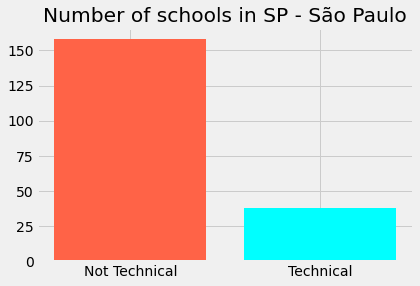

In [30]:
values, counts = np.unique(tec_filter, return_counts = True)

plt.bar(values, counts, color = ['tomato', 'cyan'])
plt.title('Number of schools in SP - São Paulo')
plt.show()

There are much more not technical schools in São Paulo. Now, let's see the distribuition over the 50 best public schools.

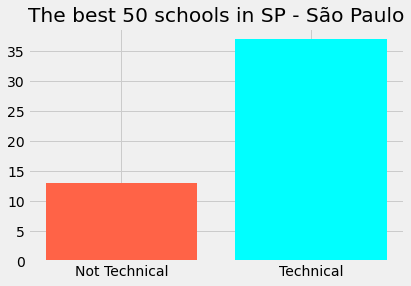

In [31]:
best_pub = sp_pub.sort_values( # filter the 50 best public schools
    by = 'mean_mat', ascending = False).head(50)
tec_filter_best_schools = np.where(
    best_pub['school_name'].isin(sp_tec['school_name']), # verify if the name of the public school is in sp_tec
    'Technical', 'Not Technical')
values, counts = np.unique(tec_filter_best_schools, return_counts = True)

plt.bar(values, counts,color = ['tomato', 'cyan'])
plt.title('The best 50 schools in SP - São Paulo')
plt.show()

It's evident that over the 50 best schools, the most of schools are technical. The graph invert when we see the best schools!   
What does that mean? Let's talk about it now, in the Conclusion.

# 4. Conclusion

In the Brazil topic, we saw that some states have really good schools, but, in general, doesn't have a good educational average in ENEM. 
In the analysis of São Paulo, we saw something similar. There are a little group in the city that have a really good educational environment, and get high grades on ENEM. Still in São Paulo, we saw that the best schools are the private ones, and then we looked for the public ones to analyze them, and found out something really interesting: the best public schools are technical schools. Why?

If you don't know, in São Paulo state are a lot of technical schools, the ETEC's. All over the state. To enroll in a ETEC, the student should be approved in a selective proccess: [a test](https://www.vestibulinhoetec.com.br/home/), just like ENEM.   
That makes the school an intellectual richier environment, exposing the student to a more favorable environment for the development of their studies. Moreover, this student has passed by an experience similiar to ENEM in his proccess to enroll in your technical school.

Even though technical education takes extra time from the student who takes it, making it busier, with less time for studies for the ENEM, these students do better than those who are not exposed to favorable environments. The same goes to the private schools, which often offer more attentive care to the student.

Thus, it is noted that the small portion exposed to these environments end up getting better grades. However, the opportunity to get involved in these academic environments is not the same for everyone, making education in the state and in the country not democratic.

What are the impacts of this inequality? Think about it, and I hope this article make you reflect on our educational system, and how environments affect our performances.

Thanks for your reading :D   
*Kenzo.* 